<a href="https://colab.research.google.com/github/SonicX-svg/ML_works/blob/main/Kuzushiji_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Методы кластеризации на данных Kuzushiji-MNIST**

In [98]:
!pip install plotly
!pip install scikit-learn
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [99]:
import pandas as pd  # для манипулирования данными [3](https://nuancesprog.ru/p/14951/)
import plotly.express as px  # для визуализации данных [3](https://nuancesprog.ru/p/14951/)
import matplotlib.pyplot as plt  # для отображения рукописных цифр [3](https://nuancesprog.ru/p/14951/)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
!pip install plotly
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Скачивание данных из официального репозитория [3](https://www.bomberbot.com/machine-learning/start-a-new-wandb-run/) - Kuzushiji-MNIST (иероглифы);
!wget https://raw.githubusercontent.com/rois-codh/kmnist/master/download_data.py
!python download_data.py 1 1


--2024-10-27 13:29:20--  https://raw.githubusercontent.com/rois-codh/kmnist/master/download_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3133 (3.1K) [text/plain]
Saving to: ‘download_data.py.2’

download_data.py.2  100%[===================>]   3.06K  --.-KB/s    in 0s      

2024-10-27 13:29:20 (8.72 MB/s) - ‘download_data.py.2’ saved [3133/3133]

**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****
Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
> ^C
Traceback (most recent call last):
  File "/home/sonikx/Documents/MOMO/download_data.py", line 80, in <module>

In [21]:
!python download_data.py

**** Could not import tqdm. Please install tqdm for download progressbars! (pip install tqdm) ****
Please select a download option:
1) Kuzushiji-MNIST (10 classes, 28x28, 70k examples)
2) Kuzushiji-49 (49 classes, 28x28, 270k examples)
3) Kuzushiji-Kanji (3832 classes, 64x64, 140k examples)
Please select a download option:
1) MNIST data format (ubyte.gz)
2) NumPy data format (.npz)
All dataset files downloaded!


In [22]:
import numpy as np

x_train = np.load('kmnist-train-imgs.npz')['arr_0'] # нужен только x
y_train = np.load('kmnist-train-labels.npz')['arr_0']

In [28]:
y_train

array([8, 7, 0, ..., 0, 4, 9], dtype=uint8)

## Анализ датасета T-SNE

In [39]:
# Преобразуем изображения в одномерные вектора
x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [78]:
x_train_flat.shape

(60000, 784)

In [80]:
# Понижение размерности с помощью PCA до 50 измерений для ускорения t-SNE
pca = PCA(n_components=200)
x_train_pca = pca.fit_transform(x_train_flat)

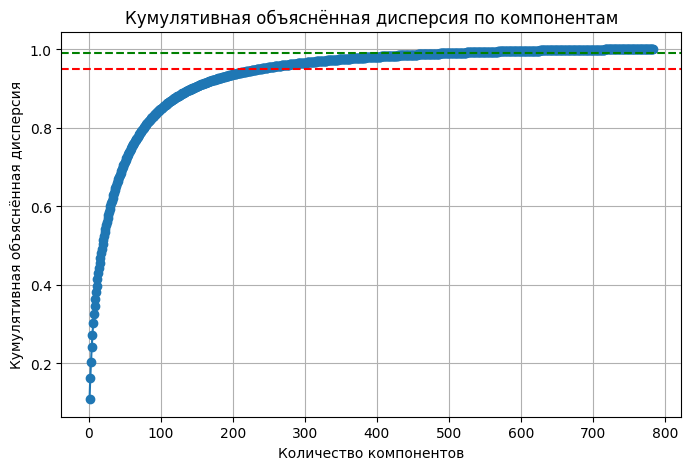

In [79]:
# Выполните PCA
pca = PCA()
pca.fit(x_train_flat)

# Вычислите объяснённую дисперсию
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Постройте график
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Кумулятивная объяснённая дисперсия по компонентам')
plt.xlabel('Количество компонентов')
plt.ylabel('Кумулятивная объяснённая дисперсия')
plt.axhline(y=0.95, color='r', linestyle='--')  # Линия для 95%
plt.axhline(y=0.99, color='g', linestyle='--')  # Линия для 99%
plt.grid()
plt.show()

In [81]:
# Применение t-SNE для понижения до 2 измерений perplexity = 30 default
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_pca)

In [82]:
# Применение t-SNE с perplexity = 50
tsne50 = TSNE(n_components=2, perplexity=50, random_state=42)
x_train_tsne50 = tsne50.fit_transform(x_train_pca)

In [83]:
# Применение t-SNE с perplexity = 10
tsne10 = TSNE(n_components=2, perplexity=10, random_state=42)
x_train_tsne10 = tsne10.fit_transform(x_train_pca)

/tmp/ipykernel_2578019/2369502220.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.12, 1, 1])  # Оставляем место для colorbar снизу


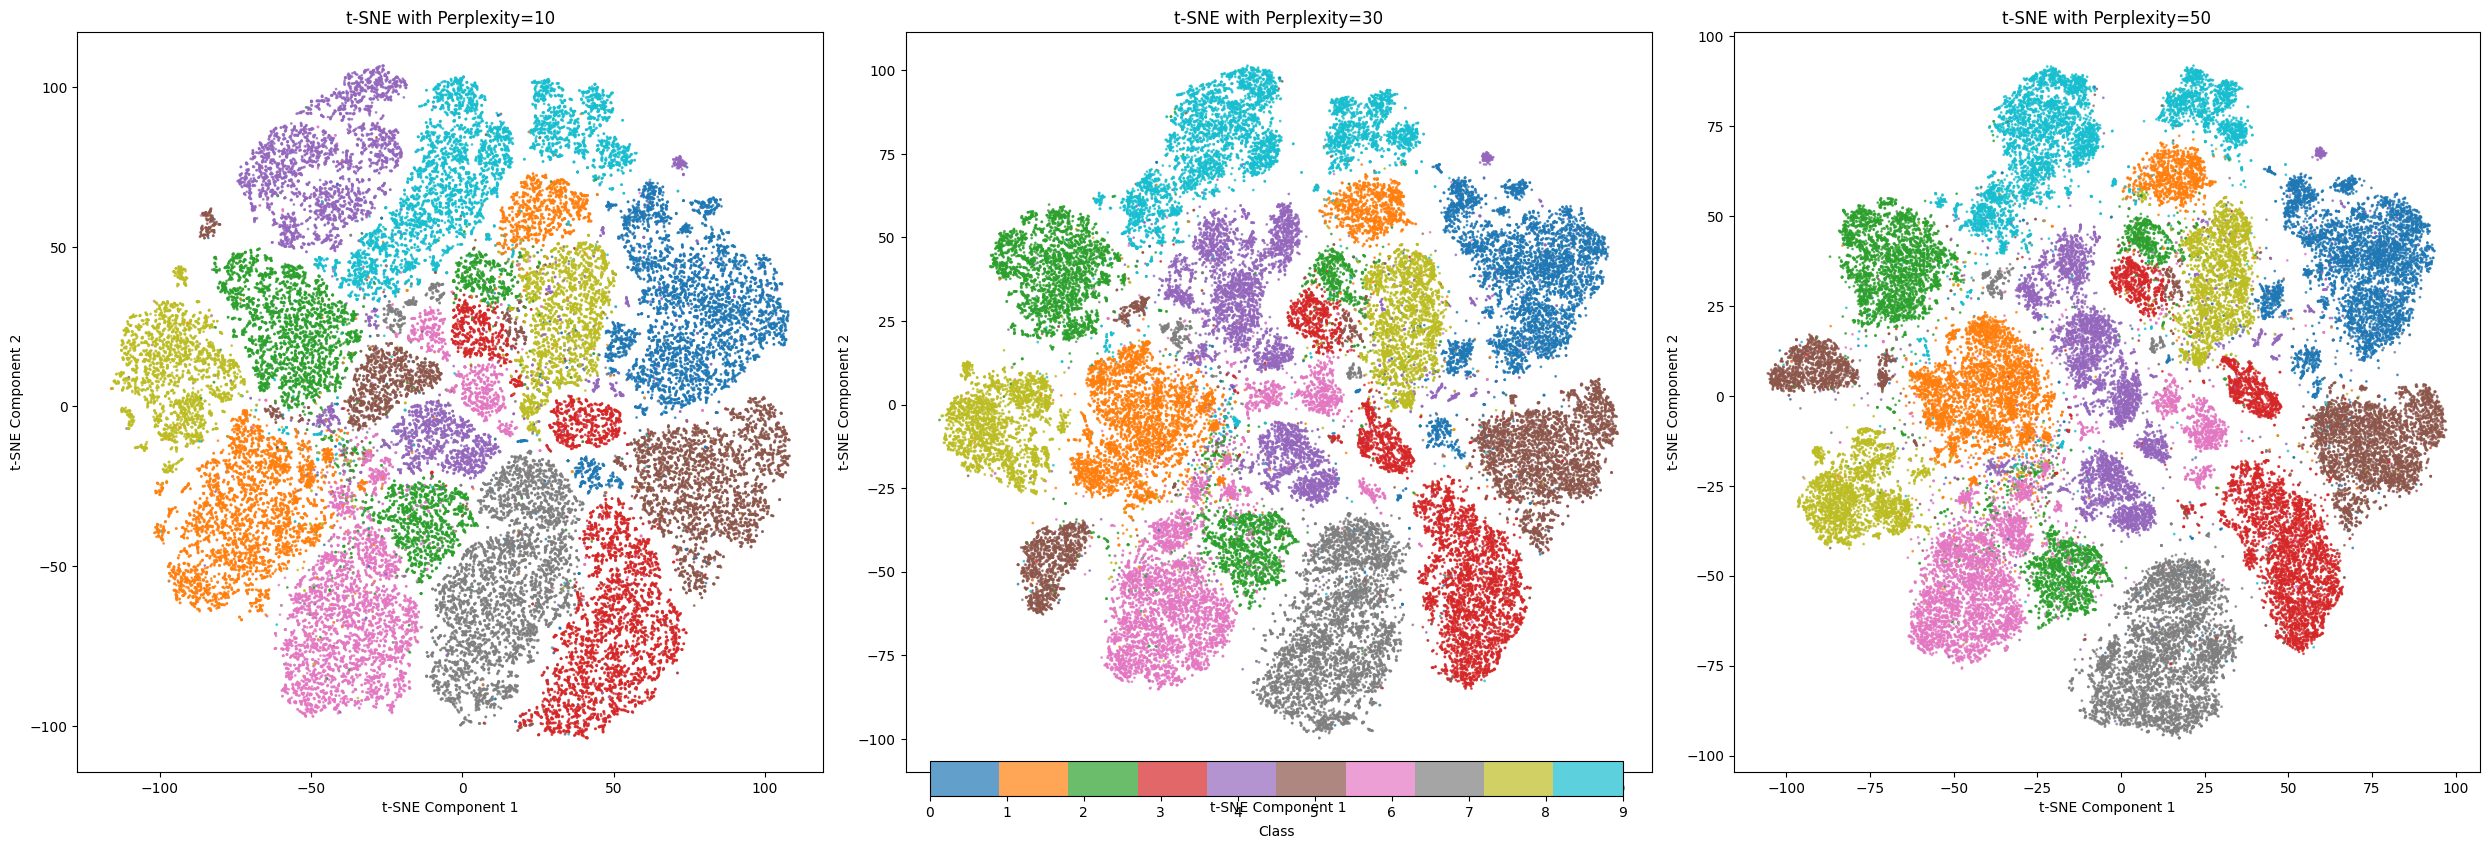

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(25, 9))

# Визуализация t-SNE с perplexity=10
scatter1 = axes[0].scatter(x_train_tsne10[:, 0], x_train_tsne10[:, 1], c=y_train, cmap='tab10', s=1, alpha=0.7)
axes[0].set_title("t-SNE with Perplexity=10")
axes[0].set_xlabel("t-SNE Component 1")
axes[0].set_ylabel("t-SNE Component 2")

# Визуализация t-SNE с perplexity=30
scatter2 = axes[1].scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='tab10', s=1, alpha=0.7)
axes[1].set_title("t-SNE with Perplexity=30")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

# Визуализация t-SNE с perplexity=50
scatter3 = axes[2].scatter(x_train_tsne50[:, 0], x_train_tsne50[:, 1], c=y_train, cmap='tab10', s=1, alpha=0.7)
axes[2].set_title("t-SNE with Perplexity=50")
axes[2].set_xlabel("t-SNE Component 1")
axes[2].set_ylabel("t-SNE Component 2")

# Общий colorbar под графиками
cbar = fig.colorbar(scatter3, ax=axes, orientation='horizontal', label="Class", fraction=0.05, pad=0.2)

plt.tight_layout(rect=[0, 0.12, 1, 1])  # Оставляем место для colorbar снизу
plt.show()

### данные имеют сложную структуру, кластеры не единые. уже на этапе анализа данных можно сказать, что методы кластеризации применять нецелесообразно, ведь классы разделены

In [53]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Силуэтный коэффициент на t-SNE с истинными метками
silhouette = silhouette_score(x_train_tsne, y_train)
print("Silhouette Score with True Labels:", silhouette)

# Индекс Дэвиса-Болдина на t-SNE с истинными метками
db_index = davies_bouldin_score(x_train_tsne, y_train)
print("Davies-Bouldin Index with True Labels:", db_index)


Silhouette Score with True Labels: 0.09846376
Davies-Bouldin Index with True Labels: 6.698236037573824


Показатеи качества кластеризации подтверждают пллохие результаты.

## Применяем методы кластеризации DBSCAN и Иерархическую

In [94]:
# Применение DBSCAN на результатах t-SNE
dbscan = DBSCAN(eps=0.5, min_samples=4)  # Настройка параметров
dbscan_labels = dbscan.fit_predict(x_train_tsne)

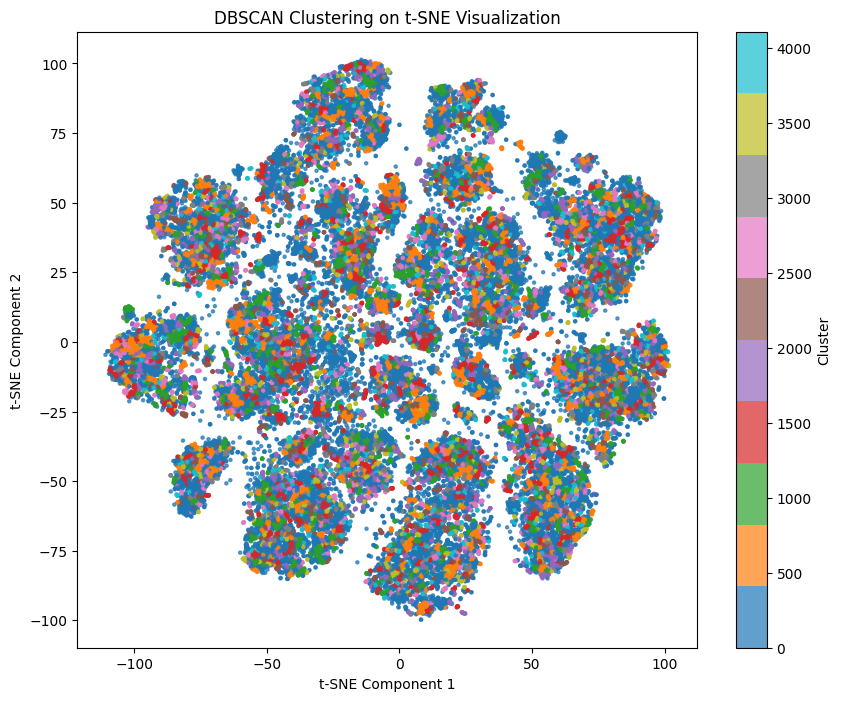

In [95]:
# Визуализация результатов
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=dbscan_labels, cmap='tab10', s=5, alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.title("DBSCAN Clustering on t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

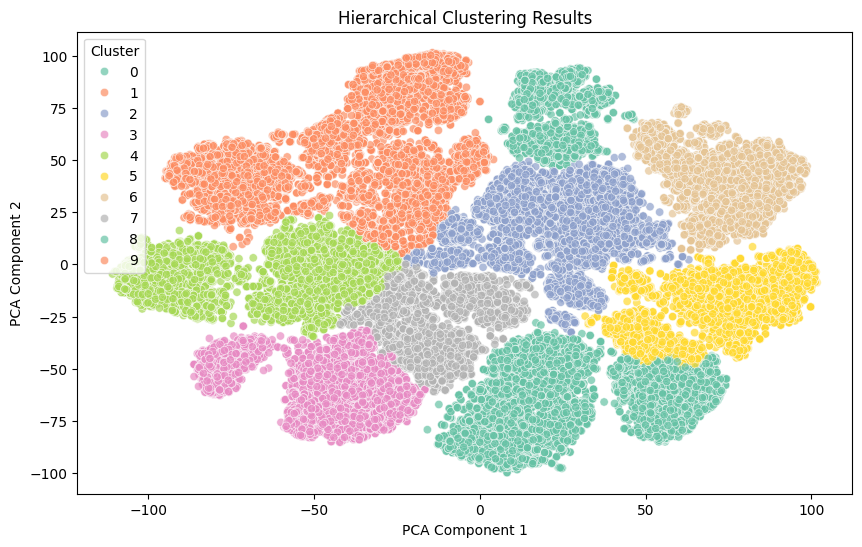

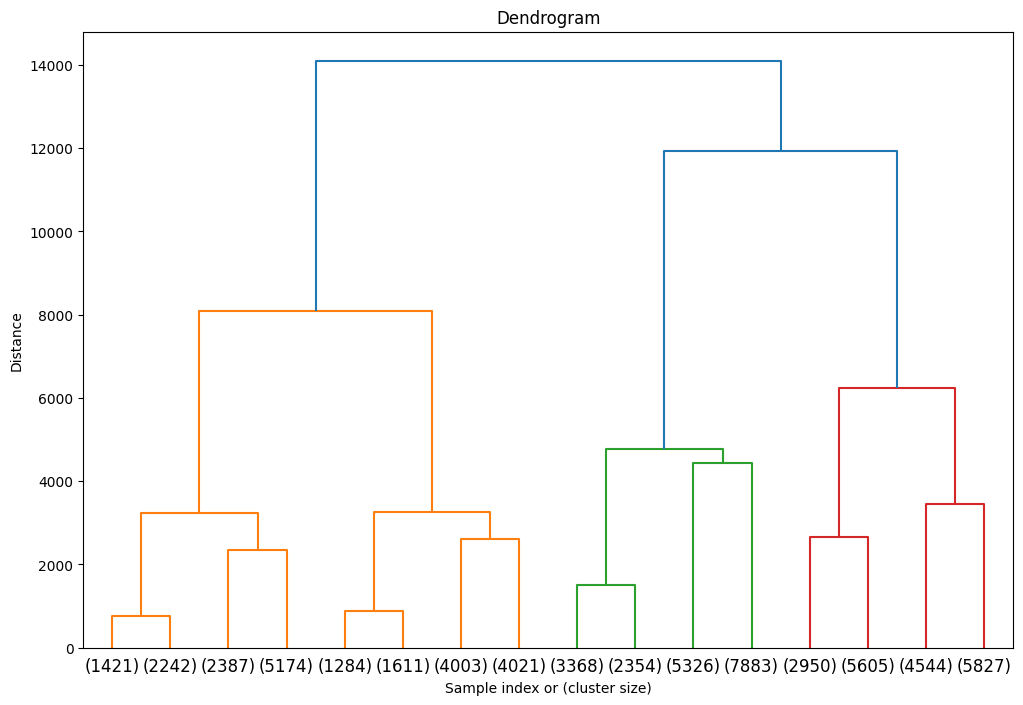

In [100]:
# Выполняем иерархическую кластеризацию
# Задаем количество кластеров
agglo_clustering = AgglomerativeClustering(n_clusters=10)
labels = agglo_clustering.fit_predict(x_train_tsne)

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1], hue=labels, palette='Set2', alpha=0.7)
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Построение дендрограммы
plt.figure(figsize=(12, 8))
Z = linkage(x_train_tsne, method='ward')  # Метод Уорда
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

In [103]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

# 1. Вычисление Silhouette Score
silhouette_avg = silhouette_score(x_train_tsne, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# 2. Вычисление Davies-Bouldin Index
db_index = davies_bouldin_score(x_train_tsne, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# 3. Если у вас есть истинные метки, можно использовать Adjusted Rand Index
# Для этого нужно загрузить истинные метки (y), если они доступны
# Например, для MNIST метки от 0 до 9


# Убедитесь, что вы сравниваете те же метки
ari = adjusted_rand_score(y_train, labels)
print(f'Adjusted Rand Index: {ari:.4f}')


Silhouette Score: 0.3550
Davies-Bouldin Index: 0.7857
Adjusted Rand Index: 0.4638


В общем, результаты показывают, что кластеризация имеет определенные успехи:
Ваш результат 0.4638 говорит о том, что есть умеренная корреляция между  кластерами и истинными метками.
Значение 0.7857 указывает на то, что кластеры имеют относительно хорошее разделение.

 pca, T-sne и последующее применение DBSCAN показывают, что данные не пригодны для кластеризации. такие данные как изображения могут иметь сильные сходства, а эти методы обьеденяют обьекты по **общей** схожести, поэтому они не используются